# Julia Fractal Visulization

The Julia set is named after the mathematician Gaston Julia who invesigated the properties of the fractal.
Though the original iterative properties was found in $z^4 + \frac{z^3}{z-1}+\frac{z^2}{z^3 + 4z^2 +5}+c$

The Julia set is now related with those points: $z = x + iy$ on the complex plane where the series $z_{n+1} = z_n + c$ does not diverge (tend to infinity when $n \rightarrow \infty$). $c$ is a complex constant and each $c$ results in a different Julia set.
The initial value of $z_0$ is just the the coorinate of the pixel on the image plane. 

More generally, we may apply such form: $z_{n+1} = f(z_n)$. Here are some examples: $z_{n+1} = csin(z_n)$, $z_{n+1} = cz_n(1-z_n)$, and $z_{n+1} = c e^{z_n}$

Using computer to compute and visulize is easy. If we are not trying to build a colorful picture, simply calculate each pixel and fill the non-converge pixels with white and converge pixels with black.

To make the picture looks interesting, I color the pixels depending on the number of iterations I performed that decides whether the pixel diverge. It seems make no sense from the perspective of mathematics, as we require that$z_n \rightarrow$, where $n \rightarrow \infty$. Here, in programing, diverging is equivalent to the statement that the l2-norm of $z_n$ is greater than 2. Also, I set a maximum iteration number to stop computer from doing infinite loops.

Then we can make use of the number of iterations I did to color the pixel.

The parameter `bkgd_color` stands for backgroud color. I color the pixel with `bkgd_color` when the iteration is very low (=0).

Then as the iterations goes up, the color of the pixel approaches color1, then color2, then color3, where you can input the color in the parameter named `three_color`. That is to say, if the pixel is closer to converge, its color tends to be color3 while if it does not converge, its color tends to be background color. Remember to input it as a tupple of three numpy arrays of length 3, each digit representing the RGB value.(range from 0 to 1).

Then there is a argument called `color_iter` to determine the number of looping over the three colors. increasing color_iter is going to result in more colorful images. (recommended values: 1,2,3,4).

## Importing libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Main Function:

In [2]:
def julia_set_plt(width=720, height=480, zoom=0.7,
                  c=(0.37, 0.1), max_iter=512, move_xy=(0.0, 0.0),
                  color_iter=1,
                  three_color=(np.array([166. / 255., 55. / 255., 55. / 255.]),
                               np.array([255. / 255., 221. / 255., 141. / 255.]),
                               np.array([31. / 255., 61. / 255., 144. / 255.])),
                  bkgd_color=np.array([0.0, 0.0, 0.0]),
                  img_title="Julia_Fractal",
                  save_flag=False):
    # creating the new image
    img = np.zeros((height, width, 3))

    # setting up the variables according to
    # the equation to create the fractal
    cX, cY = c
    moveX, moveY = move_xy

    # setting coloring
    if color_iter < 1:
        print("The input number of color iteration should be integers greater no less than 1.")
        print("Your input is invalid so it is set to the default value: 1.")
        color_iter = 1
    else:
        color_iter = math.floor(color_iter)
    clr0, clr1, clr2 = three_color

    bin_num = 3 * color_iter + 1
    one_over_bin_num = 1.0 / bin_num
    # iterate to calculate
    for x in range(width):
        for y in range(height):
            zx = 1.5 * (x - width / 2) / (0.5 * zoom * width) + moveX
            zy = 1.0 * (y - height / 2) / (0.5 * zoom * height) + moveY
            i = 0
            while zx * zx + zy * zy < 4 and i < max_iter:
                tmp = zx * zx - zy * zy + cX
                zy, zx = 2.0 * zx * zy + cY, tmp
                i += 1
            # decided the color
            clr = i / max_iter
            clr = clr - math.floor(clr)
            if clr < one_over_bin_num:
                clr = clr / one_over_bin_num
                img[y, x] = bkgd_color * (1 - clr) + clr1 * clr
            else:
                clr = (clr - one_over_bin_num) / (1 - one_over_bin_num) * color_iter
                clr = clr - math.floor(clr)
                if clr < 0.5:
                    clr = clr * 2
                    img[y, x] = (clr0 * (1 - clr) + clr1 * clr)
                else:
                    clr = (clr - 0.5) * 2
                    img[y, x] = (clr1 * (1 - clr) + clr2 * clr)

    # to display the created fractal
    fig = plt.figure()
    plt.imshow(img)
    plt.title("Julia Fractal: C = {} + {}i".format(cX, cY))
    # save the figure
    if save_flag:
        fig.savefig('{}.png'.format(img_title), dpi=1000)
    plt.show()
    print("Picture size: {} * {}".format(width, height))
    print("maximum iteration: {}".format(max_iter))
    print("Zoom parameter: {}".format(zoom))
    
    

### Julia Fractal with $C = 0.37 + 0.1i$

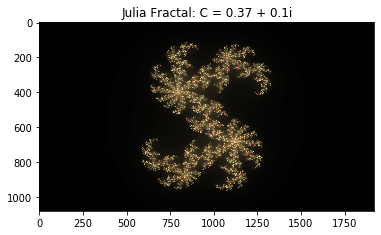

Picture size: 1920 * 1080
maximum iteration: 512
Zoom parameter: 0.7


In [3]:
julia_set_plt(width=1920, height=1080,
              zoom = 0.7,
              save_flag=True, img_title="Julia_set1")

### Julia Fractal with $C = 0 + 0.8i$

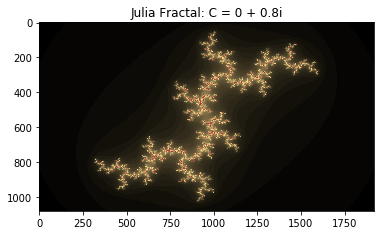

Picture size: 1920 * 1080
maximum iteration: 512
Zoom parameter: 0.8


In [4]:
julia_set_plt(width=1920, height=1080,
              c=(0, 0.8),
              color_iter=4, zoom=0.8, 
              save_flag=True, img_title="Julia_set2")

### Julia Fractal with $C = 0.355 + 0.355i$

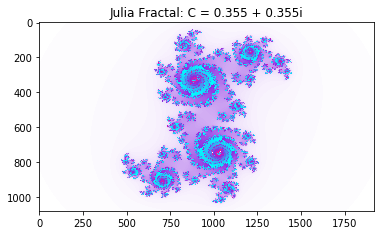

Picture size: 1920 * 1080
maximum iteration: 512
Zoom parameter: 0.8


In [5]:
julia_set_plt(width=1920, height=1080,
              c=(0.355, 0.355), color_iter=2, zoom=0.8,
              bkgd_color=np.array([1,1,1]),
              three_color=(np.array([0. / 255., 255. / 255., 255. / 255.]),
                           np.array([138. / 255., 43. / 255., 226. / 255.]),
                           np.array([255. / 255., 20. / 255., 147. / 255.])),
              save_flag=True, img_title="Julia_set3")

### Julia Fractal with $C = -0.54 + 0.54i$

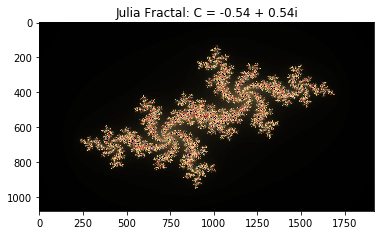

Picture size: 1920 * 1080
maximum iteration: 512
Zoom parameter: 0.8


In [6]:
julia_set_plt(width=1920, height=1080, c=(-0.54, 0.54), color_iter=1, zoom=0.8,
              save_flag=True, img_title="Julia_set4")

Let's look at a zoomed version:

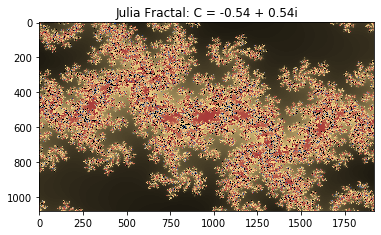

Picture size: 1920 * 1080
maximum iteration: 512
Zoom parameter: 5


In [7]:
julia_set_plt(width=1920, height=1080,
              c=(-0.54, 0.54), color_iter=1, zoom=5,
              save_flag=True, img_title="Julia_set5")

### Julia Fractal with $C = 0.34 - 0.05i$

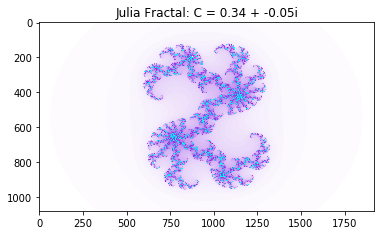

Picture size: 1920 * 1080
maximum iteration: 256
Zoom parameter: 0.7


In [8]:
julia_set_plt(width=1920, height=1080,
              c=(0.34, -0.05), color_iter=1, zoom=0.7,
              max_iter = 256,
              bkgd_color=np.array([1,1,1]),
              three_color=(np.array([0. / 255., 255. / 255., 255. / 255.]),
                           np.array([138. / 255., 43. / 255., 226. / 255.]),
                           np.array([255. / 255., 20. / 255., 147. / 255.])),
              save_flag=True, img_title="Julia_set6")

### Value of c courtesy of Chris Thomasson: $C = 0.355534 - 0.337292i$

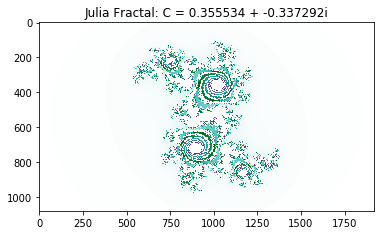

Picture size: 1920 * 1080
maximum iteration: 512
Zoom parameter: 0.7


In [9]:
julia_set_plt(width=1920, height=1080,
              c=(0.355534, -0.337292), color_iter=1, zoom=0.7,
              max_iter = 512,
              bkgd_color=np.array([1,1,1]),
              three_color=(np.array([0. / 255., 100. / 255., 0. / 255.]),
                           np.array([32. / 255., 178. / 255., 170. / 255.]),
                           np.array([128. / 255., 20. / 255., 129. / 255.])),
              save_flag=True, img_title="Julia_set7")